In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [20]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [7]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)

In [8]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [4]:
all_features.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CHILD_DEPENDENTS_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,EDUCATION_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,HEALTHCARE_MEDICAL_coef_variation,HOME_IMPROVEMENT_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PENSION_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,UNEMPLOYMENT_BENEFITS_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CHILD_DEPENDENTS_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,EDUCATION_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,HEALTHCARE_MEDICAL_count,HOME_IMPROVEMENT_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PENSION_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,UNEMPLOYMENT_BENEFITS_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CHILD_DEPENDENTS_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,EDUCATION_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,HEALTHCARE_MEDICAL_iqr,HOME_IMPROVEMENT_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PENSION_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,UNEMPLOYMENT_BENEFITS_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CHILD_DEPENDENTS_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,EDUCATION_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,HEALTHCARE_MEDICAL_median,HOME


Logistic Regression Results
ROC-AUC: 0.761 | Accuracy: 0.759
Training Time: 2.4s
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86      2416
         1.0       0.17      0.62      0.27       186

    accuracy                           0.76      2602
   macro avg       0.57      0.69      0.56      2602
weighted avg       0.91      0.76      0.81      2602


Random Forest Results
ROC-AUC: 0.794 | Accuracy: 0.915
Training Time: 22.4s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2416
         1.0       0.26      0.10      0.14       186

    accuracy                           0.92      2602
   macro avg       0.60      0.54      0.55      2602
weighted avg       0.89      0.92      0.90      2602

[LightGBM] [Info] Number of positive: 9570, number of negative: 9570
[LightGBM] [Info] Total Bins 76345
[LightGBM] [Info] Number of data points in the train set: 19140, number of used fea

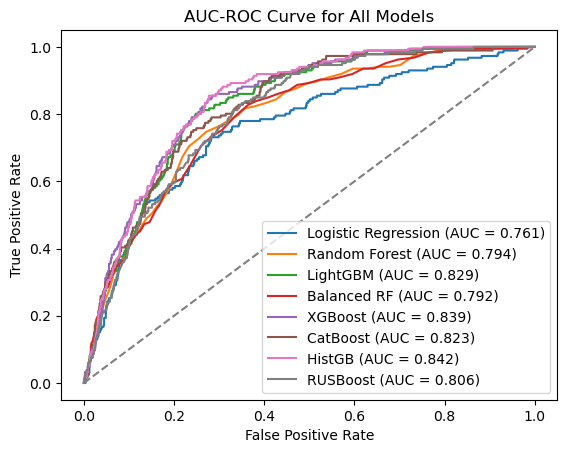

In [21]:
classification_features = (all_features.drop(columns = ['prism_consumer_id', 'evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)

In [22]:
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 100)


Logistic Regression Results
ROC-AUC: 0.778 | Accuracy: 0.742
Training Time: 0.4s
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      2416
         1.0       0.18      0.71      0.28       186

    accuracy                           0.74      2602
   macro avg       0.57      0.73      0.56      2602
weighted avg       0.91      0.74      0.80      2602


Random Forest Results
ROC-AUC: 0.789 | Accuracy: 0.911
Training Time: 16.2s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.26      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.60      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602

[LightGBM] [Info] Number of positive: 9624, number of negative: 9624
[LightGBM] [Info] Total Bins 25011
[LightGBM] [Info] Number of data points in the train set: 19248, number of used fea

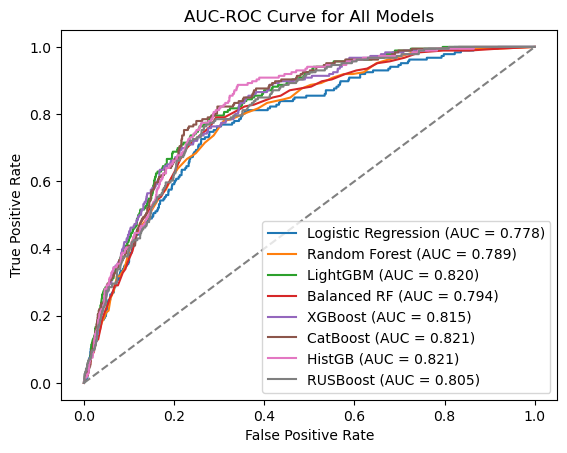

In [23]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)



Logistic Regression Results
ROC-AUC: 0.777 | Accuracy: 0.726
Training Time: 0.1s
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83      2416
         1.0       0.17      0.70      0.27       186

    accuracy                           0.73      2602
   macro avg       0.57      0.72      0.55      2602
weighted avg       0.91      0.73      0.79      2602


Random Forest Results
ROC-AUC: 0.799 | Accuracy: 0.908
Training Time: 6.6s
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2416
         1.0       0.23      0.12      0.16       186

    accuracy                           0.91      2602
   macro avg       0.58      0.55      0.56      2602
weighted avg       0.88      0.91      0.89      2602

[LightGBM] [Info] Number of positive: 9561, number of negative: 9561
[LightGBM] [Info] Total Bins 11635
[LightGBM] [Info] Number of data points in the train set: 19122, number of used feat

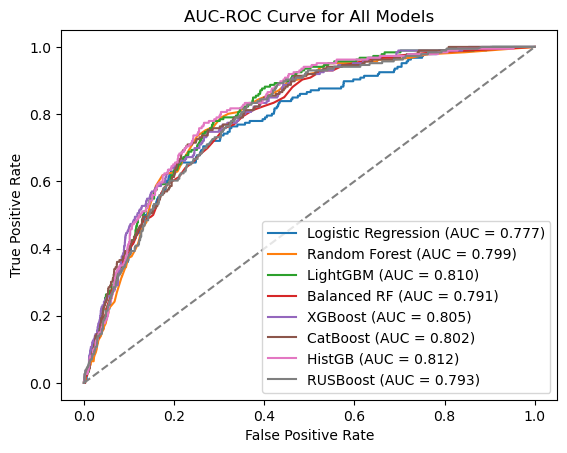

In [67]:
classify.run_classification(best_features[2], "DQ_TARGET", all_features)
